<a href="https://colab.research.google.com/github/sidmahurkar/Reliance-Stock-Price-Prediction-Using-LSTM/blob/master/Stock_price_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import sklearn

import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [48]:
df = pd.read_csv("RELIANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


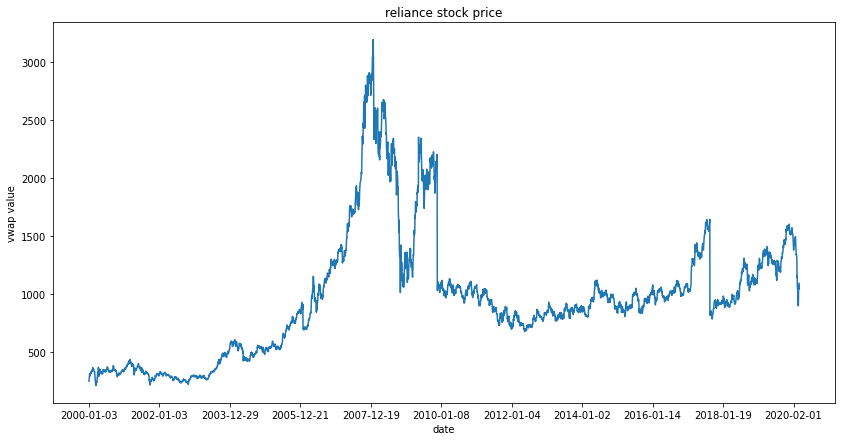

In [49]:
plt.figure(figsize=(14,7))
plt.plot(range(df.shape[0]) ,df['VWAP'])
plt.xticks(range(0,df.shape[0],500), df['Date'].loc[::500])
plt.title('reliance stock price')
plt.xlabel('date')
plt.ylabel('vwap value')
plt.show()

In [50]:
d = df[['VWAP']]
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWAP    5041 non-null   float64
dtypes: float64(1)
memory usage: 39.5 KB


In [19]:
"""vwap_values = df['VWAP'].values

print(type(vwap_values))
print(type(vwap_values[0]))
print(vwap_values)"""

<class 'numpy.ndarray'>
<class 'numpy.float64'>
[ 249.37  263.52  274.79 ... 1070.06 1044.14 1093.37]


In [21]:
"""test_size = 1000

train_data = vwap_values[:-test_size]
test_data = vwap_values[-test_size:]

print(train_data.shape)
print(test_data.shape)"""

(4041,)
(1000,)


In [22]:
"""from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalised = scaler.fit_transform(train_data.reshape(-1,1)) """

In [23]:
"""train_data_normalised[:5]"""

array([[-0.97515961],
       [-0.96568033],
       [-0.95813041],
       [-0.94428999],
       [-0.93527296]])

In [25]:
"""train_data_normalised = torch.FloatTensor(train_data_normalised).view(-1)"""

In [26]:
"""train_data_normalised.shape"""

torch.Size([4041])

In [30]:
"""seq_length = 25

def create_input_sequences(input_data, seq_len):
  input_seq = []
  l = len(input_data)

  for i in range(l - seq_len):
    train_seq = input_data[i:i+seq_len]
    train_label = input_data[i+seq_len:i+seq_len+1]
    input_seq.append((train_seq,train_label))
  
  return input_seq"""

In [32]:
"""train_inout_seq = create_input_sequences(train_data_normalised, seq_length)"""

In [34]:
"""len(train_inout_seq)"""

4016

In [35]:
"""train_inout_seq[:5]"""

[(tensor([-0.9752, -0.9657, -0.9581, -0.9443, -0.9353, -0.9330, -0.9437, -0.9449,
          -0.9333, -0.9304, -0.9307, -0.9331, -0.9271, -0.9285, -0.9265, -0.9226,
          -0.9267, -0.9200, -0.9158, -0.9202, -0.9182, -0.9124, -0.9143, -0.9112,
          -0.9105]), tensor([-0.9118])),
 (tensor([-0.9657, -0.9581, -0.9443, -0.9353, -0.9330, -0.9437, -0.9449, -0.9333,
          -0.9304, -0.9307, -0.9331, -0.9271, -0.9285, -0.9265, -0.9226, -0.9267,
          -0.9200, -0.9158, -0.9202, -0.9182, -0.9124, -0.9143, -0.9112, -0.9105,
          -0.9118]),
  tensor([-0.9077])),
 (tensor([-0.9581, -0.9443, -0.9353, -0.9330, -0.9437, -0.9449, -0.9333, -0.9304,
          -0.9307, -0.9331, -0.9271, -0.9285, -0.9265, -0.9226, -0.9267, -0.9200,
          -0.9158, -0.9202, -0.9182, -0.9124, -0.9143, -0.9112, -0.9105, -0.9118,
          -0.9077]), tensor([-0.9058])),
 (tensor([-0.9443, -0.9353, -0.9330, -0.9437, -0.9449, -0.9333, -0.9304, -0.9307,
          -0.9331, -0.9271, -0.9285, -0.9265, -0.9226, 

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df['VWAP'] = scaler.fit_transform(df['VWAP'].values.reshape(-1,1)) 

In [52]:
df['VWAP']

0      -0.975160
1      -0.965680
2      -0.958130
3      -0.944290
4      -0.935273
          ...   
5036   -0.436469
5037   -0.422092
5038   -0.425368
5039   -0.442732
5040   -0.409753
Name: VWAP, Length: 5041, dtype: float64

In [53]:
def create_train_test_data(data, seq_length):
  #convert series to numpy array
  data_as_matrix = data.to_numpy()
  # list to hold all possible sequence lengths from givven data
  data_as_seq_len = []

  for i in range(len(data_as_matrix) - seq_length):
    data_as_seq_len.append(data_as_matrix[i: i + seq_length])
  
  data_as_seq_len = np.array(data_as_seq_len)
  test_size = int(np.round(0.2 * data_as_seq_len.shape[0]))
  train_size = data_as_seq_len.shape[0] - test_size

  x_train = data_as_seq_len[:train_size, :-1]
  y_train = data_as_seq_len[:train_size, -1]

  x_test = data_as_seq_len[train_size:, :-1]
  y_test = data_as_seq_len[train_size:, -1]

  return [x_train, y_train, x_test, y_test]

seq_len = 26
x_train, y_train, x_test, y_test = create_train_test_data(df['VWAP'], seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)  

x_train.shape =  (4012, 25)
y_train.shape =  (4012,)
x_test.shape =  (1003, 25)
y_test.shape =  (1003,)


In [54]:
x_train[0]

array([-0.97515961, -0.96568033, -0.95813041, -0.94428999, -0.93527296,
       -0.93296845, -0.94365357, -0.94487952, -0.93334361, -0.93040938,
       -0.93067735, -0.93310914, -0.92705982, -0.92854702, -0.92647029,
       -0.9225714 , -0.92665787, -0.92002572, -0.91580527, -0.92016641,
       -0.91823036, -0.91238871, -0.91433146, -0.91118287, -0.91049286])

In [55]:
y_train[0]

-0.9117656910492855

In [56]:
x_train[1]

array([-0.96568033, -0.95813041, -0.94428999, -0.93527296, -0.93296845,
       -0.94365357, -0.94487952, -0.93334361, -0.93040938, -0.93067735,
       -0.93310914, -0.92705982, -0.92854702, -0.92647029, -0.9225714 ,
       -0.92665787, -0.92002572, -0.91580527, -0.92016641, -0.91823036,
       -0.91238871, -0.91433146, -0.91118287, -0.91049286, -0.91176569])

In [57]:
x_train = x_train[:,:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:,:, np.newaxis]
y_test = y_test[:, np.newaxis]

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4012, 25, 1)
y_train.shape =  (4012, 1)
x_test.shape =  (1003, 25, 1)
y_test.shape =  (1003, 1)


In [58]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [59]:
y_train.size(),x_train.size()

(torch.Size([4012, 1]), torch.Size([4012, 25, 1]))

Model

In [60]:
class LSTM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, num_layers):
    super(LSTM, self).__init__()

    self.hidden_dim = hidden_dim
    self.num_layers = num_layers

    self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, batch_first = True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x):
    # x (batch_size, seq_length, input_size)
    # hidden (n_layers, batch_size, hidden_dim)
    # r_out (batch_size, time_step, hidden_size)

    batch_size = x.size(0)

    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

    out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

    # shape output to be (batch_size*seq_length, hidden_dim)
    # out = out.view(-1, self.hidden_dim)
    # last time-step(seq_len) hidden states
    out = self.fc(out[:, -1, :]) 

    return out

In [61]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1

model = LSTM(input_size= input_dim, output_size= output_dim, hidden_dim=  hidden_dim, num_layers= 2)
criterion = torch.nn.MSELoss(size_average= True)
optimizer =  torch.optim.Adam(model.parameters(), lr= 0.01)

print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Train

In [62]:
loss_history = []
output_model = []
num_epochs = 100

for i in range(num_epochs):

  output_from_model = model(x_train)
  output_model.append(output_from_model)

  loss = criterion(output_from_model, y_train)
  if i % 3 == 0 and i!= 0:
    print("Epoch: ", i+1, "MSE Loss: ", loss.item())
  loss_history.append(loss.item())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

Epoch:  4 MSE Loss:  0.18461507558822632
Epoch:  7 MSE Loss:  0.10796801745891571
Epoch:  10 MSE Loss:  0.06075375899672508
Epoch:  13 MSE Loss:  0.03767445310950279
Epoch:  16 MSE Loss:  0.028110112994909286
Epoch:  19 MSE Loss:  0.022170646116137505
Epoch:  22 MSE Loss:  0.0072091687470674515
Epoch:  25 MSE Loss:  0.009401530958712101
Epoch:  28 MSE Loss:  0.00919294636696577
Epoch:  31 MSE Loss:  0.004598506726324558
Epoch:  34 MSE Loss:  0.005891120061278343
Epoch:  37 MSE Loss:  0.003439049469307065
Epoch:  40 MSE Loss:  0.0026913147885352373
Epoch:  43 MSE Loss:  0.0031709291506558657
Epoch:  46 MSE Loss:  0.002283975016325712
Epoch:  49 MSE Loss:  0.0017016706988215446
Epoch:  52 MSE Loss:  0.001883209217339754
Epoch:  55 MSE Loss:  0.0017231134697794914
Epoch:  58 MSE Loss:  0.0013639467069879174
Epoch:  61 MSE Loss:  0.0014428772265091538
Epoch:  64 MSE Loss:  0.001420176005922258
Epoch:  67 MSE Loss:  0.0013654170325025916
Epoch:  70 MSE Loss:  0.0012566581135615706
Epoch:  7

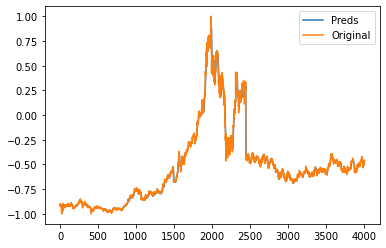

In [63]:
plt.plot(output_from_model.detach().numpy(), label="Preds")
plt.plot(y_train.detach().numpy(), label="Original")
plt.legend()
plt.show()

In [67]:
output_from_model.detach().numpy().shape

(4012, 1)

In [72]:
x =  output_from_model.view(-1)
for i in range(4012):
  print(x[i].item())

-0.9161831140518188
-0.9152036905288696
-0.9139606952667236
-0.9125844240188599
-0.9101593494415283
-0.9087392091751099
-0.9083454608917236
-0.908374547958374
-0.9081671237945557
-0.9079841375350952
-0.9083026647567749
-0.909522533416748
-0.9110183715820312
-0.9124836921691895
-0.9138892889022827
-0.9157190322875977
-0.9170899391174316
-0.9195970296859741
-0.9228479862213135
-0.9286882877349854
-0.9349179267883301
-0.9421399831771851
-0.9491188526153564
-0.955718994140625
-0.9619885683059692
-0.9676806926727295
-0.9727569818496704
-0.9752061367034912
-0.9760055541992188
-0.9764652252197266
-0.9757936000823975
-0.9751604795455933
-0.9746465682983398
-0.9729866981506348
-0.9698507785797119
-0.9661655426025391
-0.9627915620803833
-0.9577939510345459
-0.9512003660202026
-0.9463529586791992
-0.9437903165817261
-0.9409489631652832
-0.9355907440185547
-0.928337574005127
-0.9228190183639526
-0.9190878868103027
-0.919630765914917
-0.9230499267578125
-0.9261844158172607
-0.9278955459594727
-0.92

In [73]:
x.shape

torch.Size([4012])

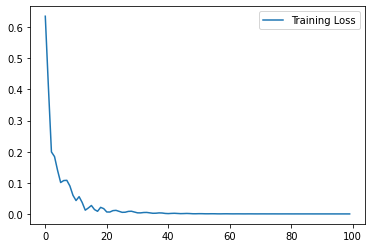

In [64]:
plt.plot(np.asarray(loss_history), label="Training Loss")
plt.legend()
plt.show()

In [45]:
x = np.random.randint(25, size=(3,4,5))
x

array([[[17, 13,  4,  4, 20],
        [21,  1, 12,  0, 24],
        [ 1,  7,  4,  7, 14],
        [12, 15, 16,  6,  2]],

       [[13,  6, 12, 14,  0],
        [22, 15, 24,  7, 13],
        [14, 22, 24, 20,  1],
        [13,  9,  9, 17, 22]],

       [[17,  5,  3,  2,  3],
        [13, 12, 11,  9, 15],
        [ 6,  9, 18, 16,  1],
        [ 0, 23,  3, 22, 24]]])

In [46]:
x[:,-1,:]

array([[12, 15, 16,  6,  2],
       [13,  9,  9, 17, 22],
       [ 0, 23,  3, 22, 24]])

In [74]:
# predictions on test dataset
y_test_pred = model(x_test)

# change the predictions back to original dataset
y_train_pred = scaler.inverse_transform(output_from_model.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

In [82]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#calculate rmse
train_rmse = sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print("Train rmse: ", train_rmse)
test_rmse = sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print("Test rmse: ", test_rmse)

Train rmse:  50.83713991681549
Test rmse:  51.90549978762487


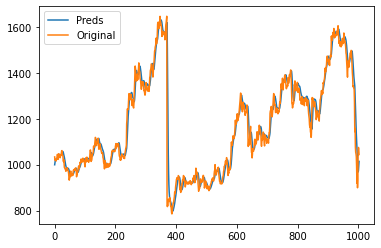

In [80]:
plt.plot(y_test_pred, label="Preds")
plt.plot(y_test, label="Original")
plt.legend()
plt.show()